# Importing Necessary Libraries

In [1]:
import pandas as pd 
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
v=pd.read_csv("Bengaluru_House_Data.csv")
v.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
 v.shape

(13320, 9)

In [4]:
v.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Droping Columns Not Relevant For Cost

In [5]:
v2=v.drop(['area_type','society','balcony','availability'],axis='columns')
v2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
v2.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

# Checking For Blanks In the Data

In [7]:
v2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
v3=v2.dropna()
v3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
v3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# Adding BHK Column

In [10]:
v3['BHK']=v3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\ALOK\AppData\Local\Temp\ipykernel_9872\3273210082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v3['BHK']=v3['size'].apply(lambda x: int(x.split(' ')[0]))


In [11]:
v3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
v4=v3.drop(['size'],axis='columns')
v4.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [13]:
v4['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
v4[v4.BHK>20]

,location,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [15]:
v4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

# Checking For Values not in Float Type

In [16]:
def is_float(z):
    try:
        float(z)
    except:
       return False
    return True

In [17]:
v4[~v4['total_sqft'].apply(is_float)].head()

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2


# Taking Average of Ranges to convert to Float

In [18]:
def convert(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
v5=v4[~(v4.BHK>20)]
v5['total_sqft']=v5['total_sqft'].apply(convert)
v5.head()

C:\Users\ALOK\AppData\Local\Temp\ipykernel_9872\375889271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v5['total_sqft']=v5['total_sqft'].apply(convert)


,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [20]:
v5.shape

(13244, 5)

In [21]:
v5.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [22]:
v6=v5.copy()
v6['price_per_sqft']=v6['price']*100000/v6['total_sqft']
v6.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [23]:
v6['bath_per_bhk']=v6['bath']/v6['BHK']
v6.head()

,location,total_sqft,bath,price,BHK,price_per_sqft,bath_per_bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,1.000000
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615,1.250000
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,0.666667
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861,1.000000
4,Kothanur,1200.0,2.0,51.00,2,4250.000000,1.000000


In [24]:
loc_stats=v6.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stats

location
Whitefield              534
Sarjapur  Road          392
Electronic City         302
Kanakpura Road          266
Thanisandra             233
                       ... 
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
Kanakapura Main Road      1
whitefiled                1
Name: location, Length: 1303, dtype: int64

In [25]:
len(loc_stats[loc_stats<=10])

1062

In [26]:
less=loc_stats[loc_stats<=10]


In [27]:
v6.location=v6.location.apply(lambda x:'other' if x in less else x)
len(v6.location.unique())

242

In [28]:
v6[v6.total_sqft/v6.BHK<300].head()

,location,total_sqft,bath,price,BHK,price_per_sqft,bath_per_bhk
9,other,1020.0,6.0,370.0,6,36274.509804,1.000000
45,HSR Layout,600.0,9.0,200.0,8,33333.333333,1.125000
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810,0.666667
68,other,1350.0,7.0,85.0,8,6296.296296,0.875000
70,other,500.0,3.0,100.0,3,20000.000000,1.000000


In [29]:
v6.shape

(13244, 7)

In [30]:
v6.price_per_sqft.describe()

count    1.319800e+04
mean     7.919658e+03
std      1.067351e+05
min      2.678298e+02
25%      4.267910e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

# Outlier Removal

In [31]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
v7 = remove_pps_outliers(v6)
v7.shape

(11433, 7)

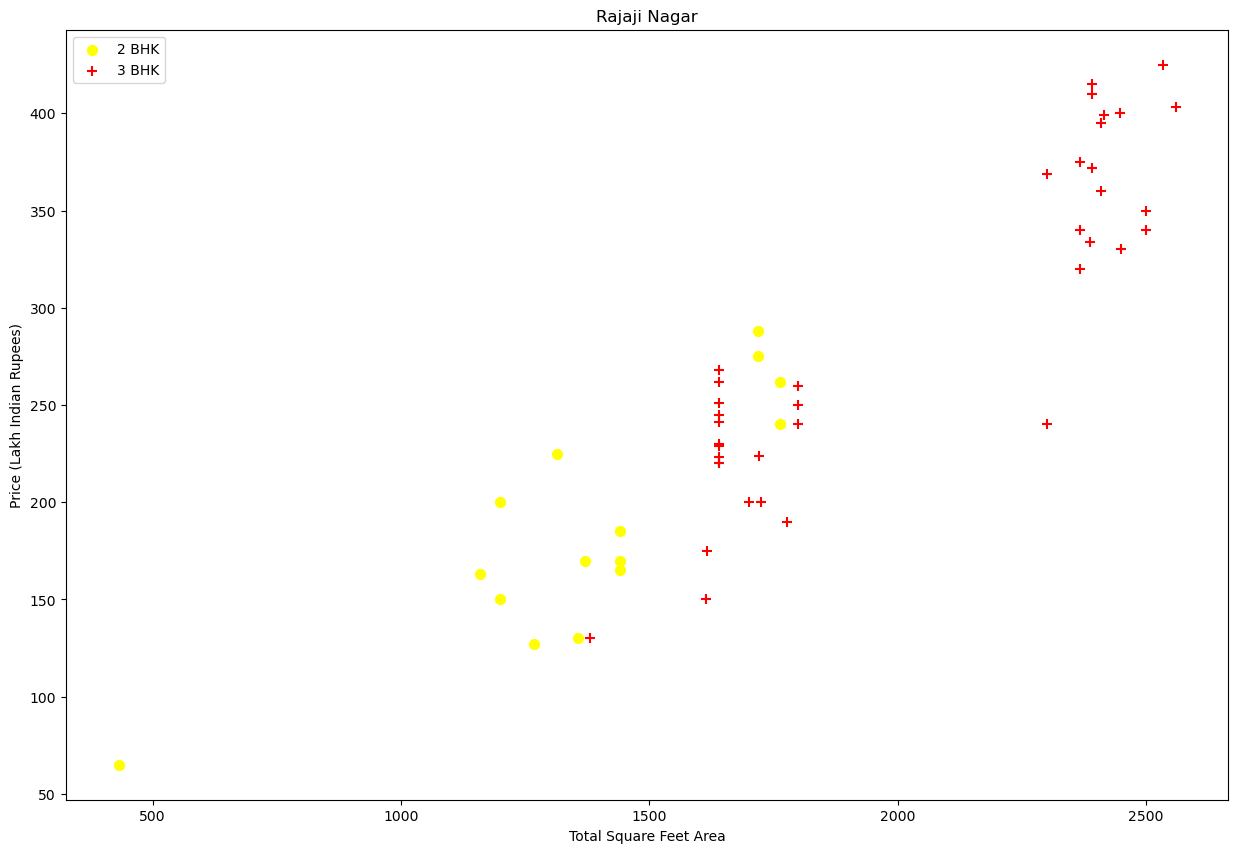

In [32]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='yellow',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='red',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(v7,"Rajaji Nagar")

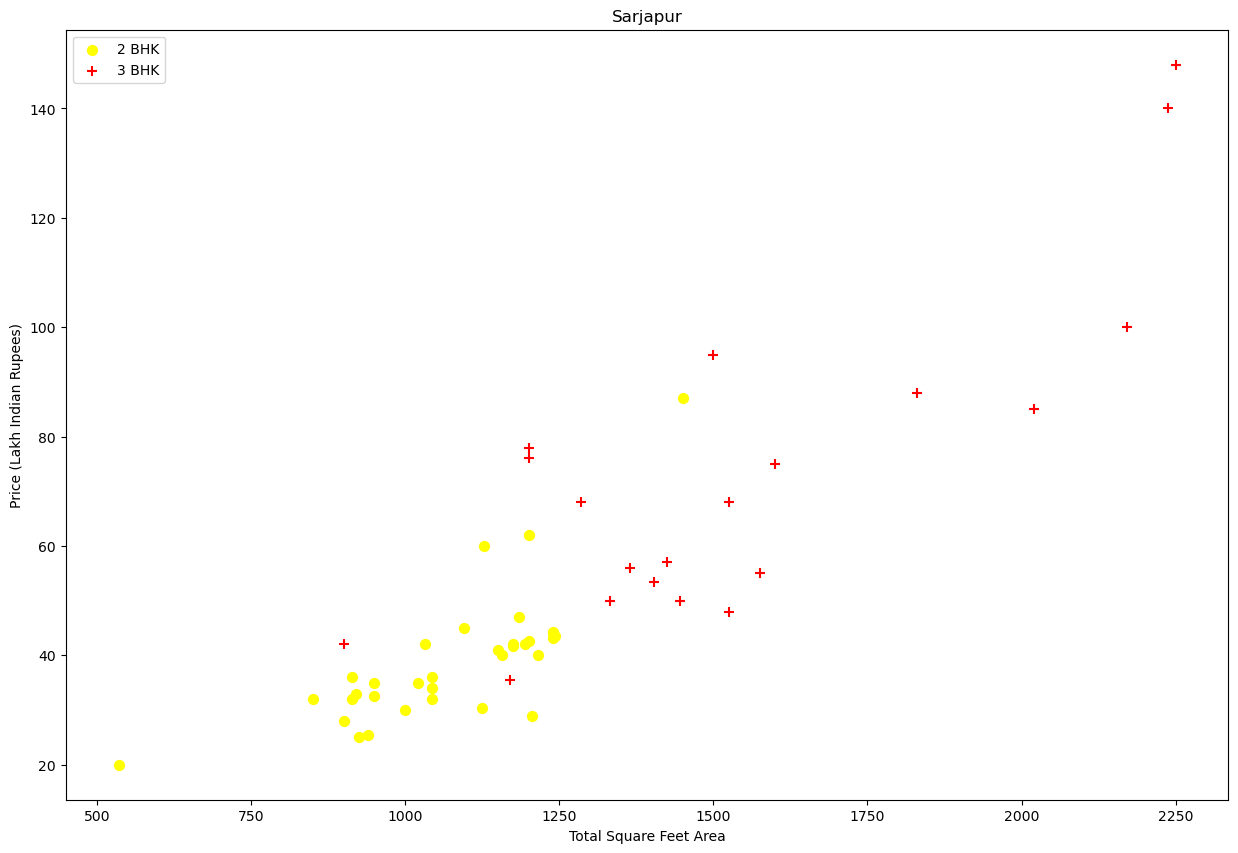

In [33]:
plot_scatter_chart(v7,"Sarjapur")

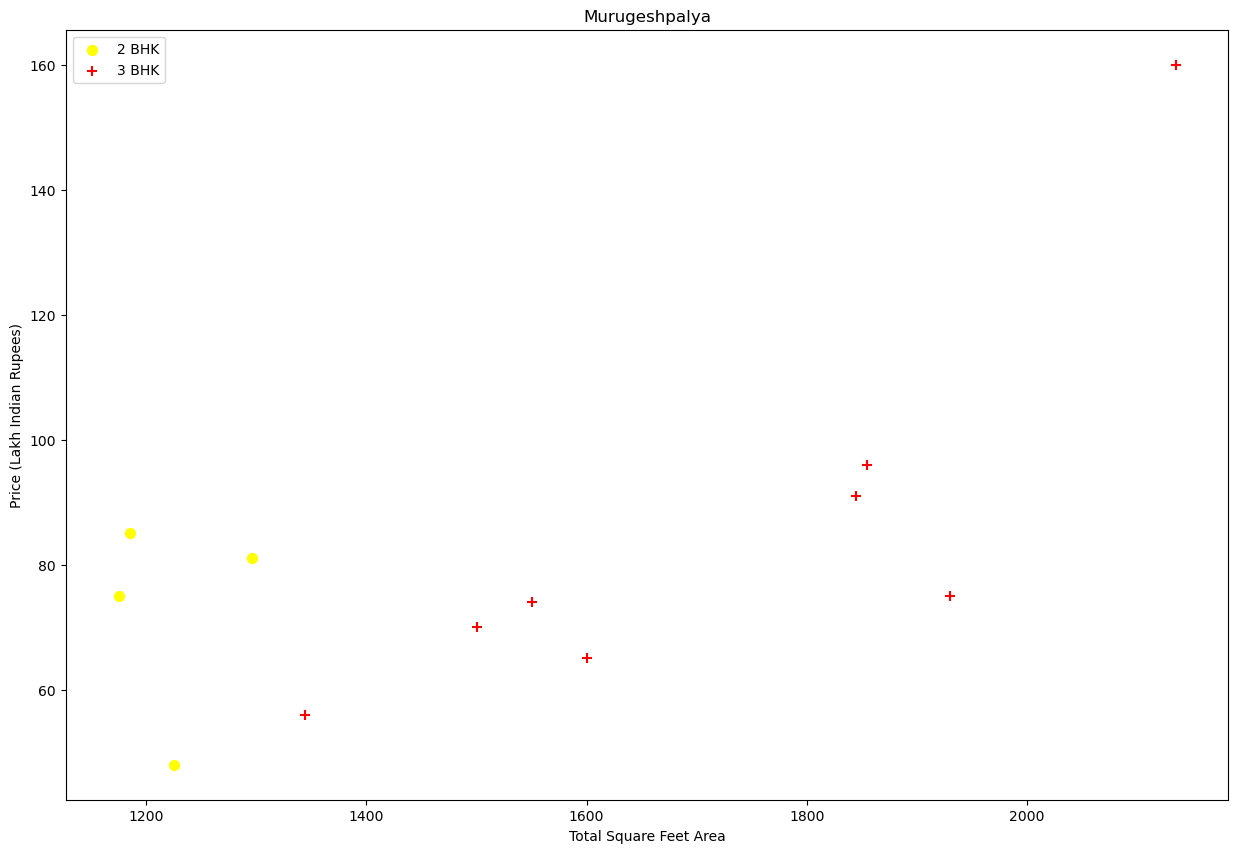

In [34]:
plot_scatter_chart(v7,"Murugeshpalya")

In [35]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        BHK_stats = {}
        for BHK, BHK_df in location_df.groupby('BHK'):
            BHK_stats[BHK] = {
                'mean': np.mean(BHK_df.price_per_sqft),
                'std': np.std(BHK_df.price_per_sqft),
                'count': BHK_df.shape[0]
            }
        for BHK, BHK_df in location_df.groupby('BHK'):
            stats = BHK_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
v8 = remove_bhk_outliers(v7)

v8.shape

(8023, 7)

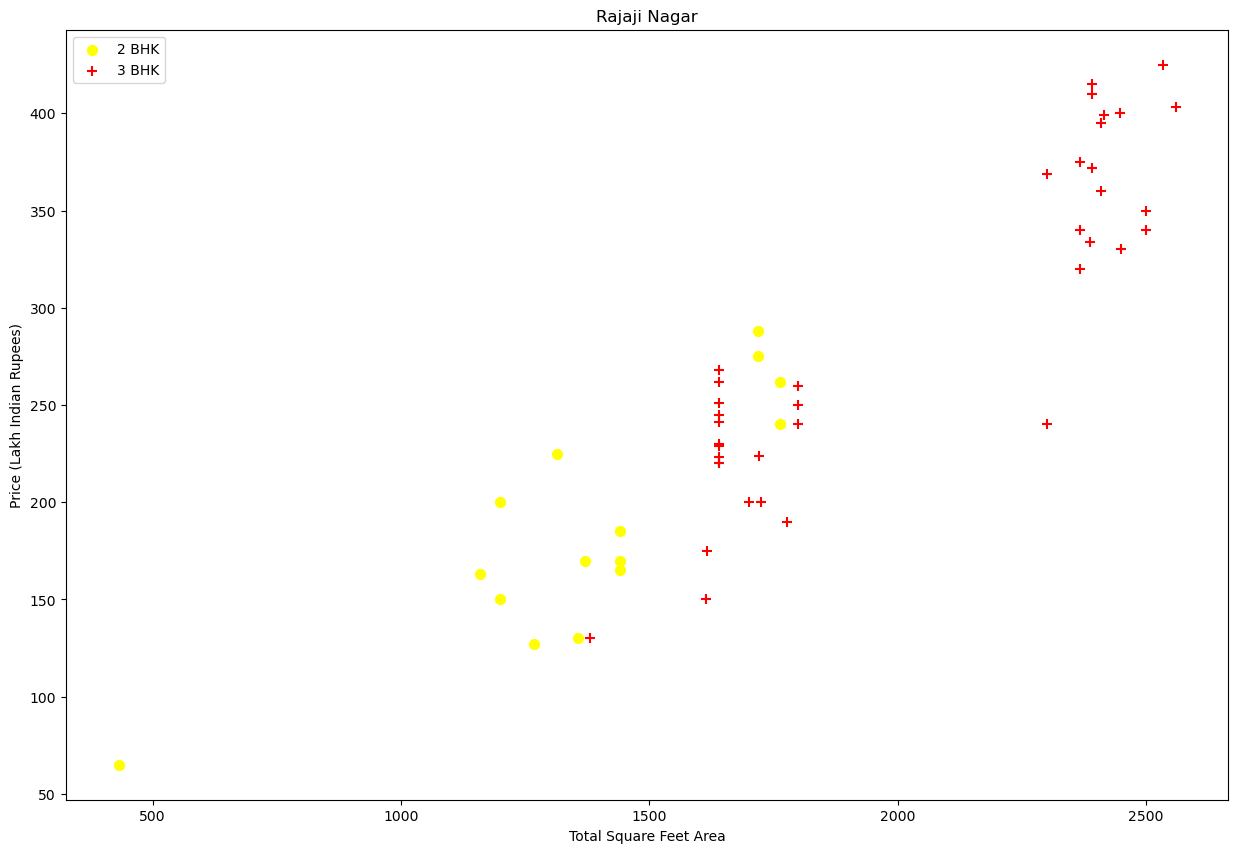

In [36]:
plot_scatter_chart(v7,"Rajaji Nagar")

Text(0, 0.5, 'Count')

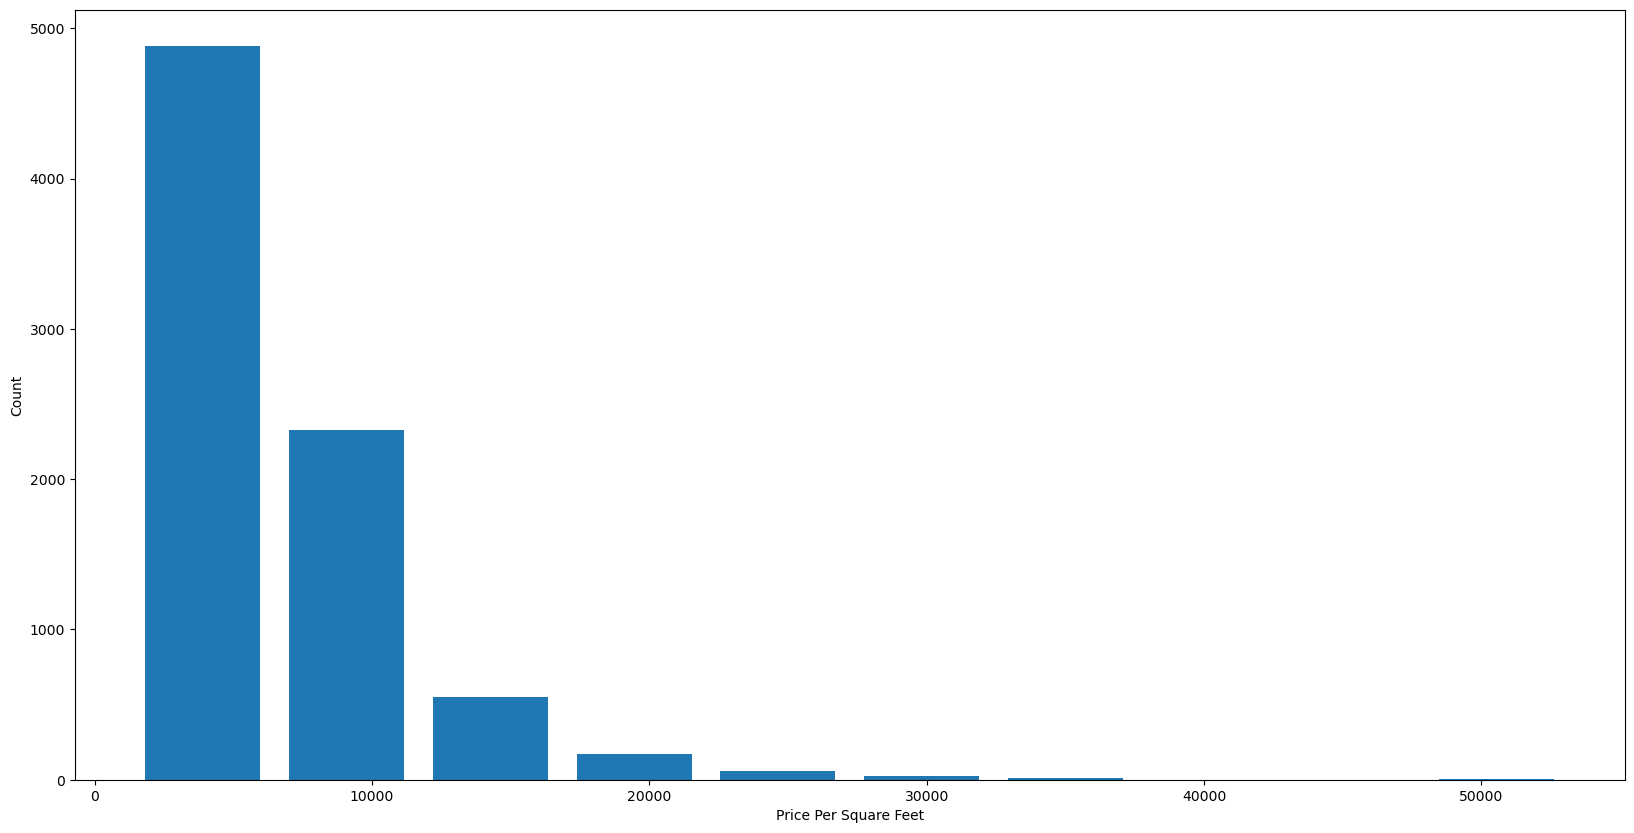

In [37]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(v8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [38]:
v8.bath.unique()

array([ 2.,  3.,  4.,  6.,  5.,  1.,  8.,  7.,  9., 10., 12., 14., 16.,
       15., 13., 18.])

Text(0, 0.5, 'Count')

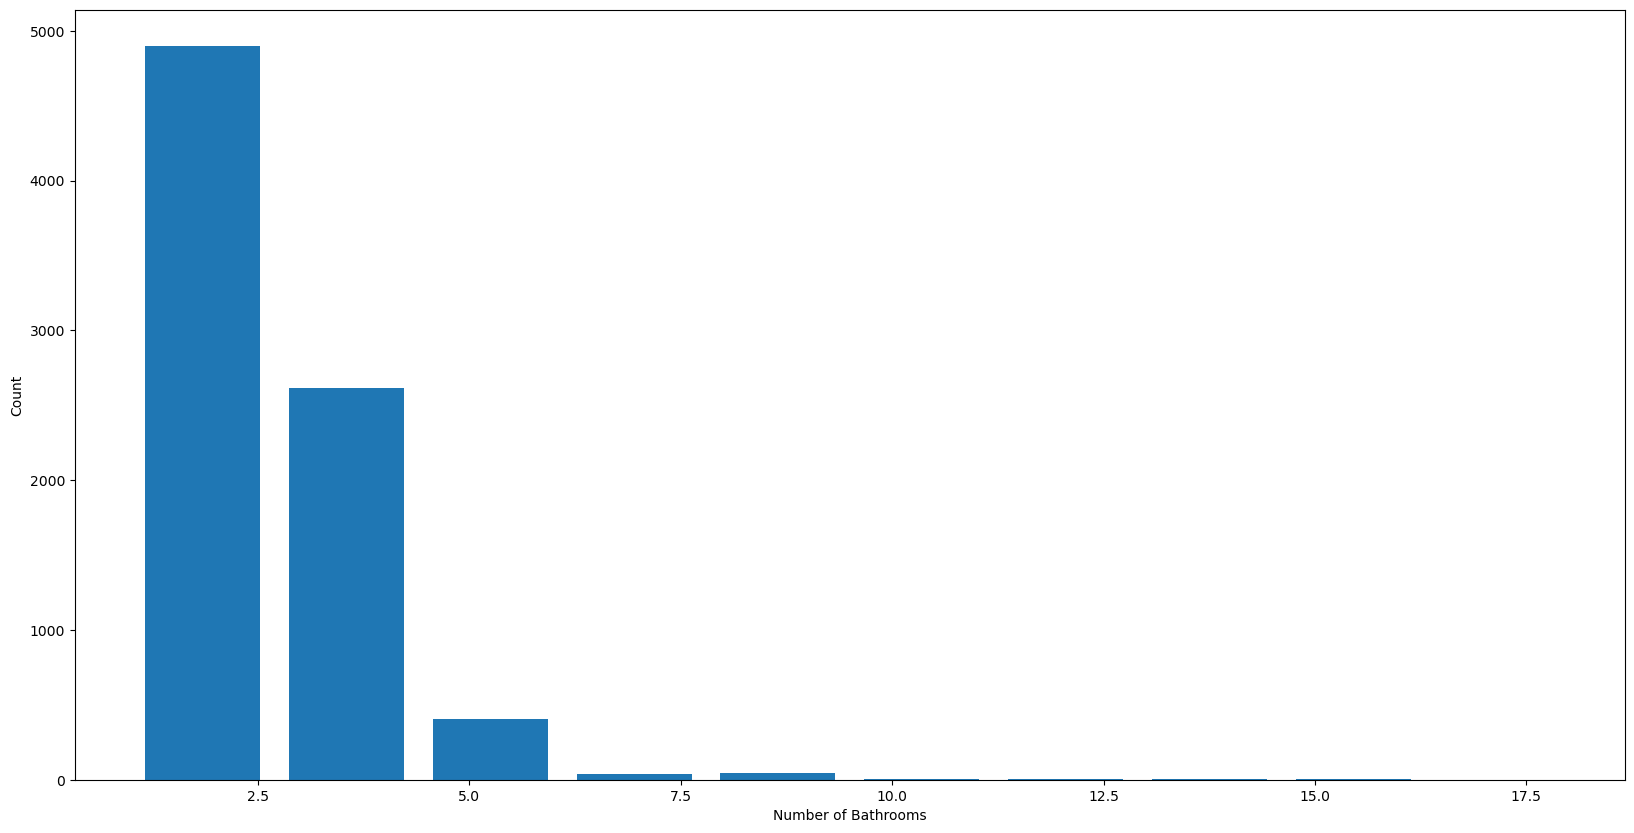

In [39]:
plt.hist(v8.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [40]:
v8.head()

,location,total_sqft,bath,price,BHK,price_per_sqft,bath_per_bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000,1.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667,1.000000
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419,1.000000
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509,0.666667
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699,1.000000


In [41]:
v8[v8.bath_per_bhk>1.5]

,location,total_sqft,bath,price,BHK,price_per_sqft,bath_per_bhk
32,1st Phase JP Nagar,840.00,2.0,50.0,1,5952.380952,2.000000
350,Abbigere,765.00,2.0,30.0,1,3921.568627,2.000000
505,Ananth Nagar,500.00,2.0,14.0,1,2800.000000,2.000000
633,Attibele,418.00,2.0,11.5,1,2751.196172,2.000000
655,BTM 2nd Stage,1260.00,5.0,185.0,3,14682.539683,1.666667
...,...,...,...,...,...,...,...
11133,other,2750.00,5.0,550.0,3,20000.000000,1.666667
11170,other,600.00,4.0,70.0,2,11666.666667,2.000000
11229,other,5656.00,5.0,499.0,3,8822.489392,1.666667
11312,other,2777.29,5.0,649.0,3,23368.103439,1.666667


In [42]:
v8[v8.bath>v8.BHK+2]

,location,total_sqft,bath,price,BHK,price_per_sqft,bath_per_bhk
1645,Chamrajpet,1500.0,9.0,230.0,6,15333.333333,1.500000
1781,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520,1.750000
5596,Nagasandra,7000.0,8.0,450.0,4,6428.571429,2.000000
7221,Thanisandra,1806.0,6.0,116.0,3,6423.034330,2.000000
8806,other,3300.0,14.0,500.0,9,15151.515152,1.555556
9001,other,990.0,12.0,120.0,8,12121.212121,1.500000
10311,other,1850.0,12.0,300.0,8,16216.216216,1.500000
10697,other,2400.0,6.0,775.0,3,32291.666667,2.000000
11370,other,7150.0,13.0,3600.0,10,50349.650350,1.300000


In [43]:
v9=v8[~(v8.bath_per_bhk>1.5)]
v9.shape

(7955, 7)

In [44]:
v10=v9.drop(['price_per_sqft'],axis='columns')
v10.head(15)

,location,total_sqft,bath,price,BHK,bath_per_bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1.000000
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1.000000
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1.000000
4,Devarachikkanahalli,1425.0,2.0,65.0,3,0.666667
5,Devarachikkanahalli,947.0,2.0,43.0,2,1.000000
6,Devarachikkanahalli,1130.0,2.0,36.0,2,1.000000
7,Devarachikkanahalli,1417.0,2.0,76.0,3,0.666667
8,Devarachikkanahalli,1230.0,2.0,58.0,2,1.000000
9,Devarachikkanahalli,1705.0,3.0,75.0,3,1.000000
10,Devarachikkanahalli,1116.0,2.0,47.0,2,1.000000


In [45]:
dumies=pd.get_dummies(v10.location)
dumies.head(4)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
v11=pd.concat([v10,dumies.drop(['other'],axis='columns')],axis='columns')
v11.head(3)

,location,total_sqft,bath,price,BHK,bath_per_bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
v12=v11.drop(['location'],axis='columns')
v12.head(6)

,total_sqft,bath,price,BHK,bath_per_bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1.000000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,83.0,2,1.000000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,40.0,2,1.000000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,65.0,3,0.666667,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,43.0,2,1.000000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1130.0,2.0,36.0,2,1.000000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
x=v12.drop('price',axis='columns')
x.head()

,total_sqft,bath,BHK,bath_per_bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1.000000,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2,1.000000,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2,1.000000,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,3,0.666667,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,2,1.000000,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
y=v12.price
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

# Training Models
Had some issues in applying different models in this part

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [51]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.7454450514669118

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=15, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.75685183, 0.70042722, 0.62961996, 0.675927  , 0.70739416,
       0.66505357, 0.62611816, 0.74100148, 0.68703507, 0.63321333,
       0.71373916, 0.69930426, 0.74899444, 0.69205027, 0.67371538])

In [53]:
def predict_price(location,sqft,bath,BHK):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = BHK
    if loc_index >= 0:
        X[loc_index] = 1

    return lr_clf.predict([X])[0]


In [54]:
predict_price('1st Phase JP Nagar',1000,2,2)

C:\Users\ALOK\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.91575681844647

In [55]:
predict_price('1st Phase JP Nagar',1500,3,3)

C:\Users\ALOK\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


168.59101841277476

In [56]:
predict_price('1st Phase JP Nagar',1000,1,1)

C:\Users\ALOK\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.62016176285941

In [57]:
predict_price('Whitefield',1800,2,3)

C:\Users\ALOK\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


158.4248264028966